# <font color="Orange"> Housing Prediction 

# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

# Loading and Understanding the Dataset

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.describe(include="O")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Data Preprocessing

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
num_col=df.select_dtypes(include="number")

# Removing Outliers

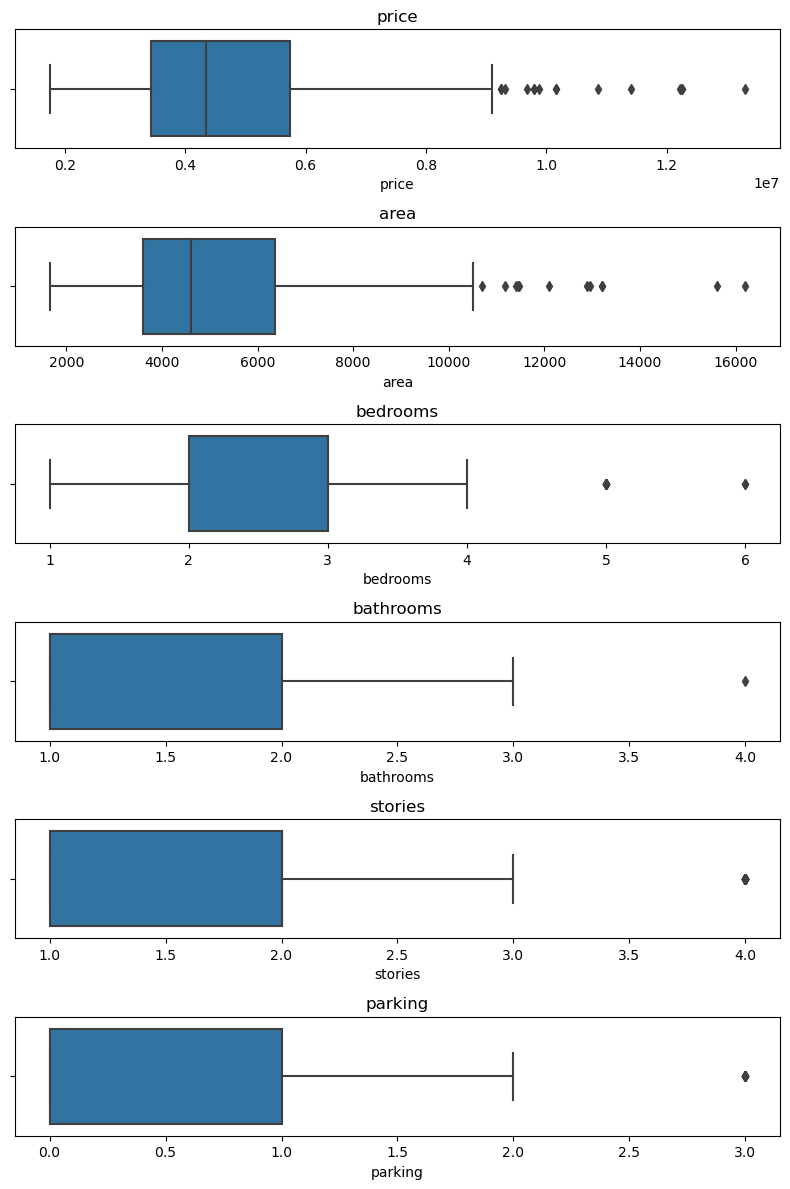

In [12]:
fig,axes=plt.subplots(nrows=len(num_col.columns),figsize=(8,2*len(num_col.columns)))
for i,column in enumerate(num_col.columns):
    sns.boxplot(x=num_col[column],ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

* The column "price" and "area" have outliers in their column.

* We have to remove the outliers

In [13]:
col_out=["price","area"]
for column in col_out:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    df=df[~((df[column]<(Q1-1.5*IQR)) | (df[column]>(Q3+1.5*IQR)))]

* Outliers are removed using IQR method

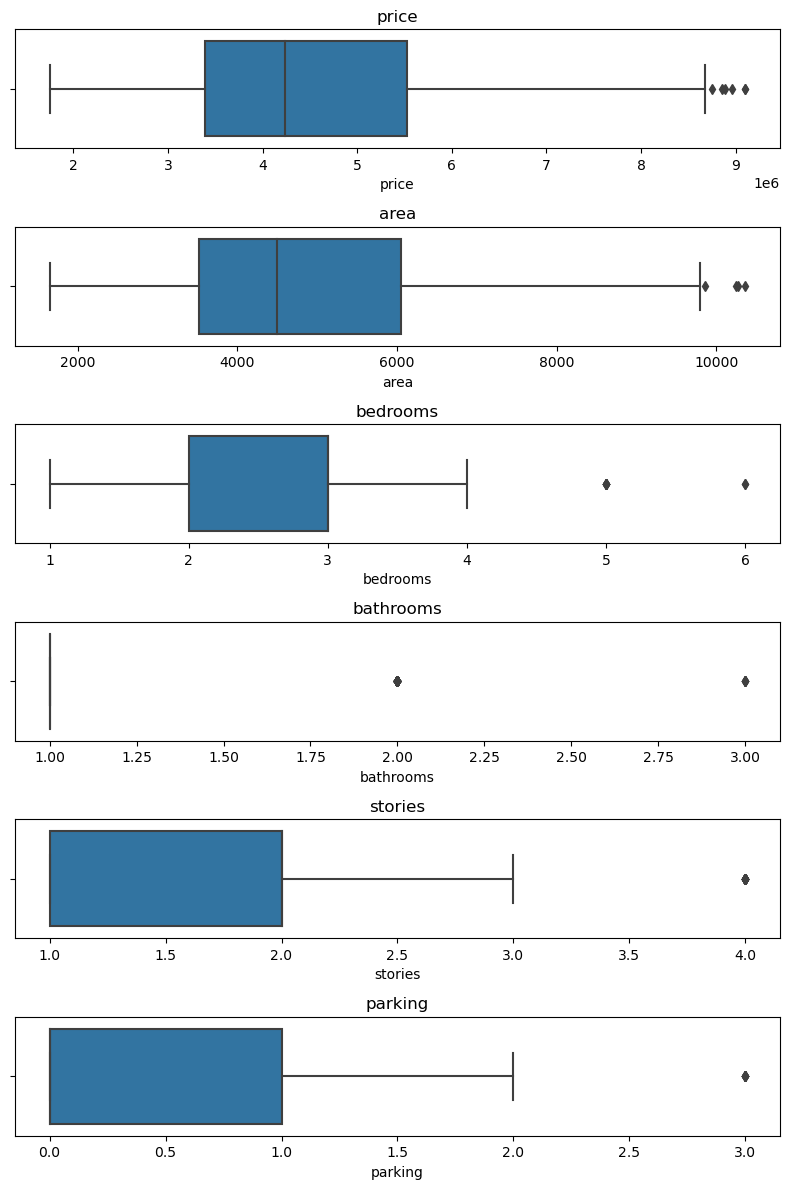

In [14]:
fig,axes=plt.subplots(nrows=len(num_col.columns),figsize=(8,2*len(num_col.columns)))
for i,column in enumerate(num_col.columns):
    sns.boxplot(x=df[column],ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

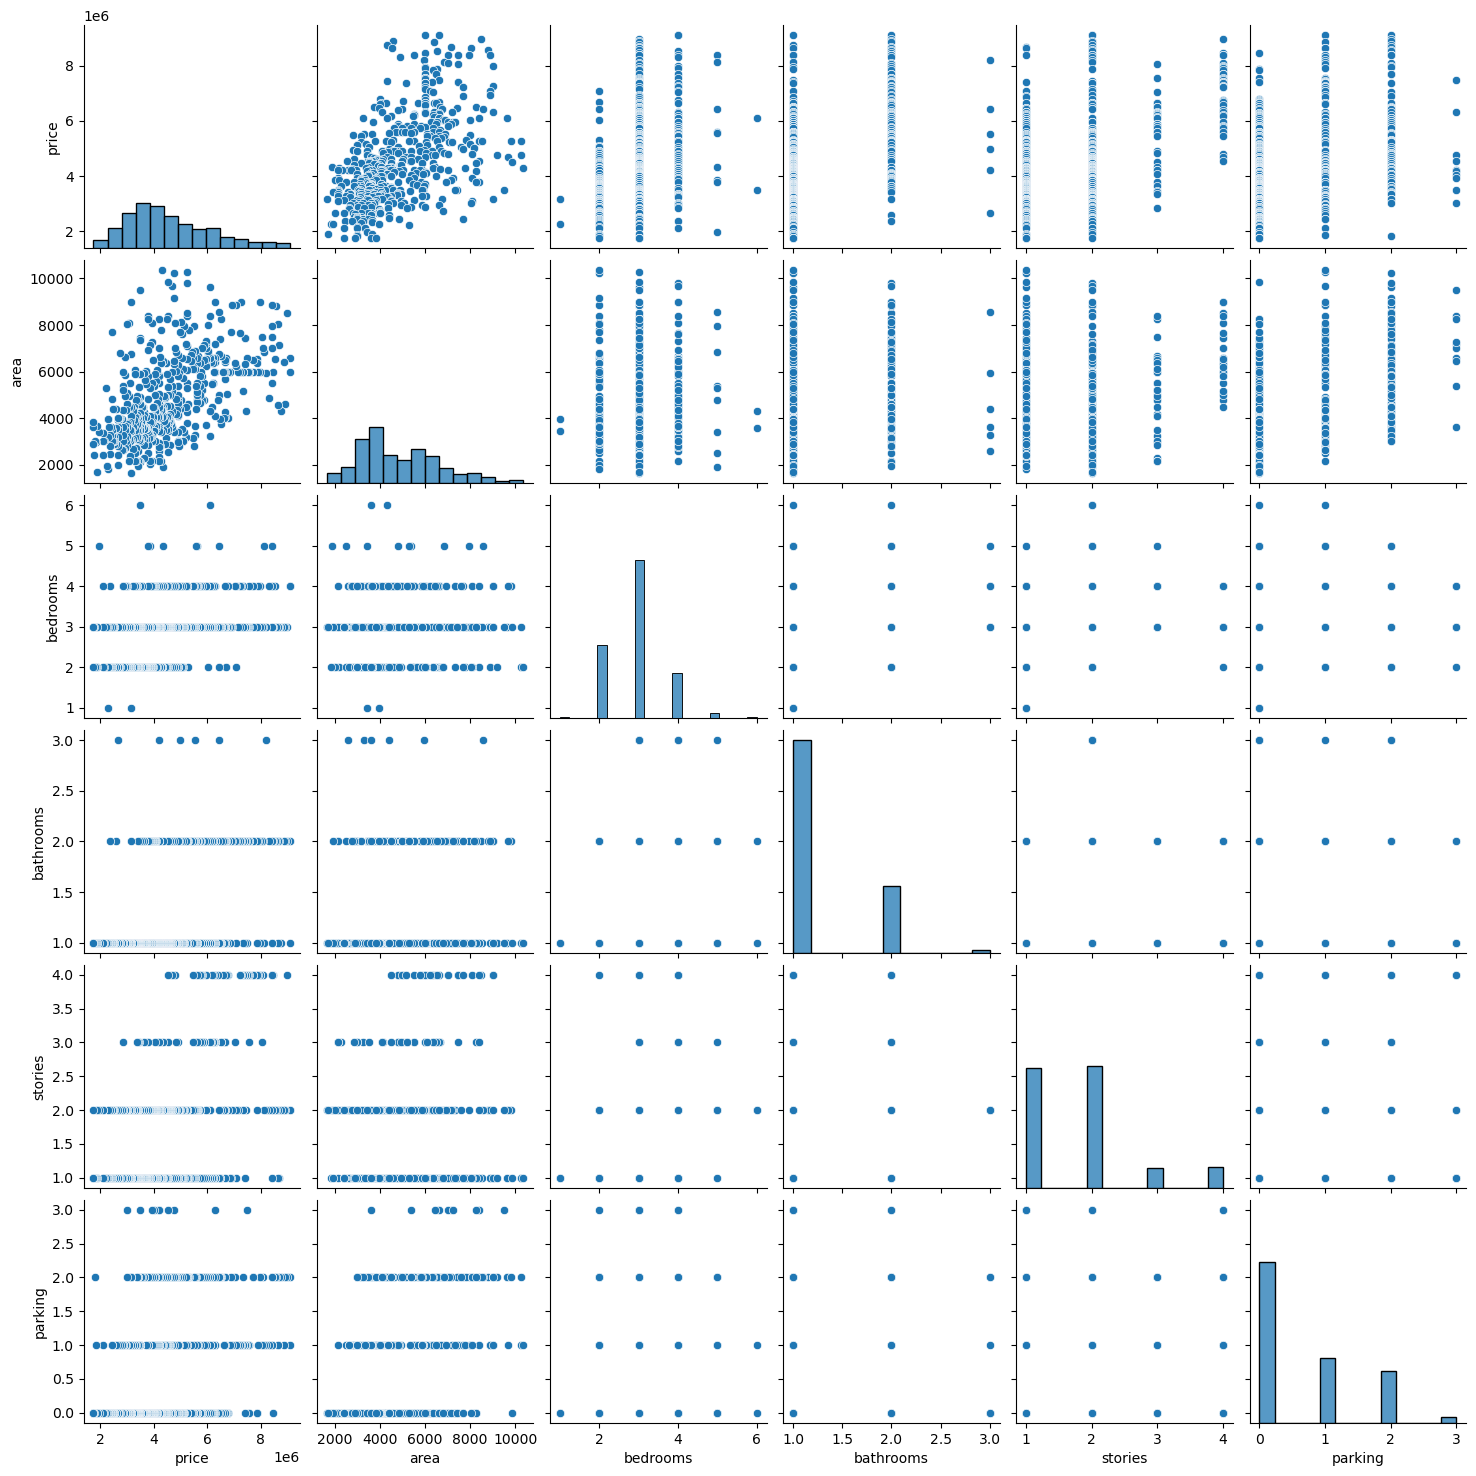

In [15]:
sns.pairplot(data=df)
plt.show()

# Data Preparation for Model Building

In [16]:
status=pd.get_dummies(df["furnishingstatus"],drop_first=True)

In [17]:
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [18]:
df=pd.concat([df,status],axis=1)

In [19]:
df.drop("furnishingstatus",axis=1,inplace=True)

In [20]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,1,0
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,0,1
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,0,0
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,0,0
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,0,0


In [21]:
categ=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
def yesorno(x):
    return x.map({"yes":1,"no":0})
df[categ]=df[categ].apply(yesorno)

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [23]:
X=df.drop("price",axis=1)

In [24]:
y=df["price"]

# Splitting the Dataset into Train and Test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1009965541849.4854
Mean Absolute Error (MAE): 733975.5857952024
R-squared (R2): 0.677295015007165


In [29]:
avgprc=df["price"].mean()

In [30]:
rmse=np.sqrt(mse)
print(f'Mean Squared Error (MSE): {rmse}')

Mean Squared Error (MSE): 1004970.4183952309


In [31]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

In [32]:
mape

16.27926865524244

# Model Evaluation

In [33]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_scores
print("Cross-Validation MSE scores:", cross_val_mse)
print(f"Mean Cross-Validation MSE: {np.mean(cross_val_mse)}")
print(f"Standard Deviation Cross-Validation MSE: {np.std(cross_val_mse)}")

Cross-Validation MSE scores: [8.10596843e+11 5.90292054e+11 1.18235544e+12 1.01432077e+12
 7.86132626e+11]
Mean Cross-Validation MSE: 876739546270.0397
Standard Deviation Cross-Validation MSE: 203453338282.733


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
coefficients = model.coef_
intercept = model.intercept_

In [35]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_scaled)
model_stats = sm.OLS(y_train, X_train_const).fit()
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     45.51
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           9.40e-66
Time:                        16:39:40   Log-Likelihood:                -5232.0
No. Observations:                 346   AIC:                         1.049e+04
Df Residuals:                     332   BIC:                         1.055e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+06    2.2e+05      9.409      0.0

# Inference
* R-Squared value is 0.641, between 0 and 1 ,implies that the model explains 64% of variability in target variable and remaining is unexplained.

In [36]:
residuals = y_train - model.predict(X_train_scaled)

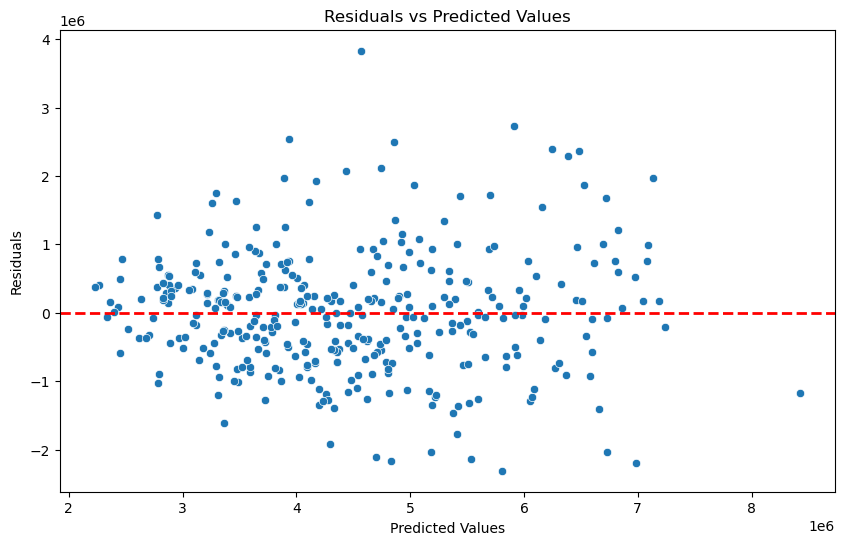

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(X_train_scaled), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

* This is a good model because it is not distributed in a specific pattern or shape.It is distributed without any shape

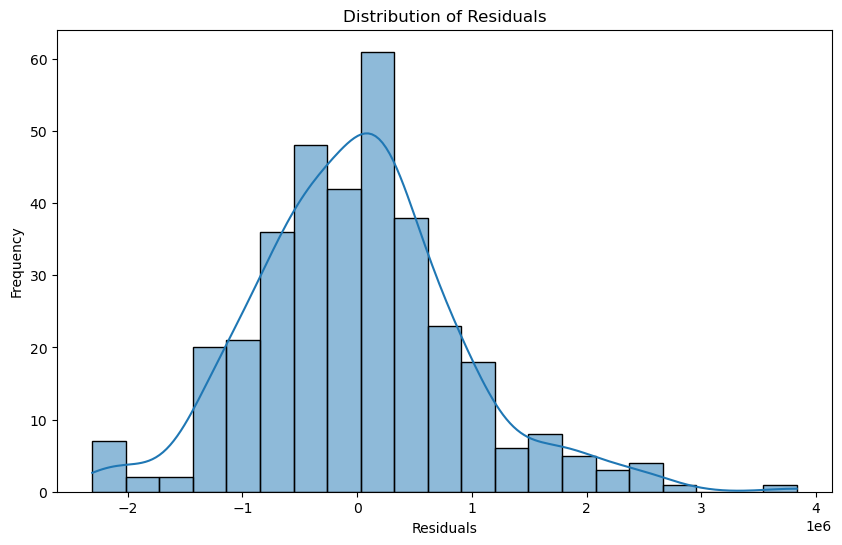

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

* This is a bell curved shape so it is not skewd into one side

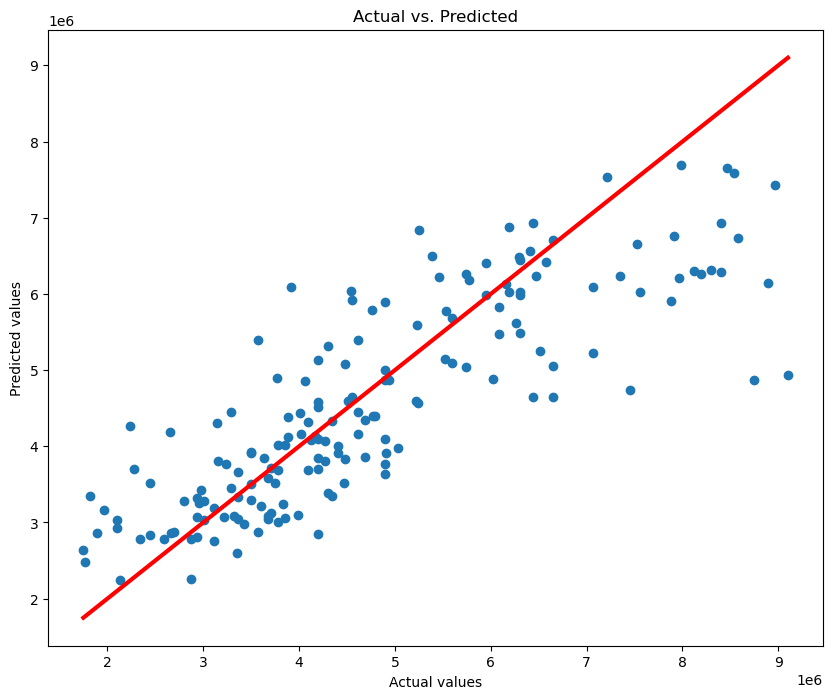

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.show()

* This plot shows that our model almost correctly predicted y values.